# [Help Cassava Farmers in Sub-Saharan Africa by Detecting Leaf Deseases](https://www.kaggle.com/competitions/cassava-leaf-disease-classification)

## Introduction

You've been entrusted by a prestigious NGO to revolutionize the future for smallholder cassava farmers in Sub-Saharan Africa. Cassava, a lifeline for communities, serves as the second-largest provider of carbohydrates. However, viral diseases are ravaging these vital crops, posing a threat to food security for millions of people.

Cassava's resilience in harsh conditions makes it a cornerstone for subsistence farming, with over 80% of household farms in the region relying on this starchy root. Recently the crops have been facing viral diseases that result in poor yields. To tackle this problem, farmers with often limited ressources have been seeking the help of experts to try to visuallly inspect and diagnose the diseases affecting the plants. This process is labor-intensive and costly, limiting the number of fields that can be inspected.

This is where your expertise comes into play. You've been tasked with utilizing the latest advances in machine learning to classify 21,367 labeled images of cassava leaves, sourced from real Ugandan fields. These images, captured by farmers in their gardens, represent the authentic challenges they are confronted with.

### Your mission
Categorize each image into one of four disease categories or mark it as a healthy leaf. By helping solve this problem, you're potentially saving crops from irreversible harm. The impact of your work could be monumental, offering farmers a swift and accessible means to identify and treat diseased plants.

**By proposing a solution, you're safeguarding a crucial food source for communities. With your help, farmers armed with mobile-quality cameras could act promptly, ensuring cassava fields thrive, yielding better harvests and securing the food supply for countless families. Ready to use your skills for real-world change? Start coding!**

## Guide
If you're not sure where to start, here are some ideas to get you started. **You're not expected to complete all those** and answer all the questions. Try to save enough time to train a model and reflect on what you've learned during this group project.

### 1. Explore Dataset
Before starting anything starts by loading the dataset as it can take a few minutes. To do so follow the instructions in [Section 2: Loading the Dataset of the Notebook](#scrollTo=MhOXUQOPqI1R).

You can start by exploring the dataset and learn more about the problem. Try to answer the following questions:
- How many samples by class is there in the dataset ? Is it relatively equilibrated ? If no, could that be a problem ?
- What are the different diseases and how do they affect the plant ? What are some characteristics of the different disseases ? How can we recognize them ?
- Visualize some of the images of the different diseases in the dataset. Can you make any interesting observations ?

Some useful references to get you started:
- https://www.kaggle.com/c/cassava-leaf-disease-classification/discussion/198143
- https://www.kaggle.com/code/ihelon/cassava-leaf-disease-exploratory-data-analysis
- https://www.kaggle.com/code/tanulsingh077/how-to-become-leaf-doctor-with-deep-learning

### 2. Choose a Machine Learning Pipeline
Now that you're familiar with the dataset, think about what Machine Learning pipeline you want to use:
- What type of model do think would be relevant to solve this task ?
- What loss function do you want to use ?
- What optimizer do you want to use ?
- What data-augmentation techniques could be useful ?

You can look here for inspirations:
- https://www.kaggle.com/c/cassava-leaf-disease-classification/code?competitionId=13836&sortBy=voteCount&excludeNonAccessedDatasources=true
- https://www.kaggle.com/c/cassava-leaf-disease-classification/discussion?sort=votes

Find a notebook or model you find interesting:
- What do you find interesting about the model ?
- How does the model work ?
- Answer the previous questions for the model you picked.

### 3. Implement your Machine Learning Pipeline
If you don't know how to get started you can look at the following [example of code](#scrollTo=PJkLauw_sa-_).

A pretrained model is also available and can be used as a starting point.

### 4. Train your model

**Don't forget to modify the runtime type to GPU...**

While your model is training discuss together about what small changes you could make to the Machine Learning Pipeline to try to improve the performance of the model:
- What hyperparameters could you change ? What effect do you think it's going to have on the model ?

### 5. Evaluate your model
Now that you've trained your model it's time to evaluate it. With your group discuss the following points:
- How does the model perform ? Could your model be deployed in the real world ? If no, why do you think it's not ready yet ?
- What do think could be potential limitations of the model you trained ?
- If you were to deploy the model in the real world, how would you monitor the performance of the model to make sure the model actually work ?
- What do you think could be some challenges of deploying the model in the real world ?

### 6. Reflect on your experience
Congratulations on training your model and helping solve an important problem !
With your group exchange together about your experience:
- What did you learn ?
- If you had more time to work on this, what would you want to work on or improve ? What would be your next steps ?
- What did you find most interesting about this group project ?

## Additional Ressources
- https://www.kaggle.com/competitions/cassava-leaf-disease-classification/code
- https://www.kaggle.com/c/cassava-leaf-disease-classification/discussion/198143
- https://www.kaggle.com/code/ihelon/cassava-leaf-disease-exploratory-data-analysis
- https://www.kaggle.com/code/tanulsingh077/how-to-become-leaf-doctor-with-deep-learning
- https://www.kaggle.com/code/ateplyuk/simplest-starting-code-cassava-leaf-pytorch
- https://www.kaggle.com/code/abhinand05/vision-transformer-vit-tutorial-baseline
- https://www.kaggle.com/code/khyeh0719/pytorch-efficientnet-baseline-train-amp-aug
- https://www.kaggle.com/code/yasufuminakama/cassava-resnext50-32x4d-starter-training
- https://www.kaggle.com/code/japandata509/ensemble-resnext50-32x4d-efficientnet-0-903
- https://www.kaggle.com/code/piantic/train-cassava-starter-using-various-loss-funcs
- https://www.kaggle.com/code/junyingsg/step-by-step-guide-to-denoising-your-labels
- https://www.kaggle.com/code/piantic/vision-transformer-vit-visualize-attention-map
- https://www.kaggle.com/code/kmat2019/cycle-gan-to-enlarge-training-data



## Loading the Dataset
Before loading the dataset and running those steps, please ensure the notebook is running on a GPU instance.

In [1]:
from typing import Callable, Any, Optional
import os
import zipfile
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch
from PIL import Image
import pandas as pd
import numpy as np
from torchvision.transforms import v2
from torchvision.models import shufflenet_v2_x0_5, ShuffleNet_V2_X0_5_Weights
import tqdm
from sklearn import model_selection

class CassavaDataset(Dataset):
    def __init__(self, path_to_dataset, root: str  = "./data", transform: Optional[Callable[[Any], Any]] = None, train: bool = True, seed=1234):
        super().__init__()
        self.root = os.path.join(root, 'cassava-leaf-disease-classification')
        self.transform = transform

        if not os.path.exists(os.path.join(self.root, 'train.csv')):
            print("Extracting the dataset. This can take a few minutes. While the dataset is being extracted, start thinking on how to use the data.")

            with zipfile.ZipFile(path_to_dataset, 'r') as z:
                z.extractall(self.root)
            print("Successfully extracted the data !")

        dataset = pd.read_csv(os.path.join(self.root, 'train.csv'), dtype={'image_id': str, 'label': np.uint8})
        label_values = dataset.label.values
        if label_values is None:
            raise ValueError("No labels found in the dataset")

        trainset, validset = model_selection.train_test_split(dataset, test_size=0.1, random_state=42, stratify=label_values)
        if train:
            self.dataset = trainset
        else:
            self.dataset = validset


    def __len__(self):
        return len(self.dataset)

    def __getitem__(self,idx):
        data = self.dataset.iloc[idx]
        filename = os.path.join(self.root, "train_images", data["image_id"])
        img = Image.open(filename)

        if self.transform:
            img = self.transform(img)

        label = data["label"]

        return {
            'image': img,
            'target': torch.tensor(label,dtype=torch.float)
        }

1. Start by creating a shortcut to the [Module-2-Group-Project](https://drive.google.com/drive/folders/11lBAsdDlCXOjqmnjbJhRumrhAUL0ZpSM?usp=sharing) folder in your drive. For more information on how to create add a shortcut in Google Drive see [this document](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop&sjid=16338272406757761256-NA).

2. Mount your drive using the following command

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Locate the path to the [Cassava Leaf Desease dataset](https://drive.google.com/file/d/1Ld97V3yTnOOZ8M9Z1boXhrcOi-rblzHP/view?usp=drive_link) in the Files of your runtime. The path should look like this: `/content/drive/MyDrive/Module-2-Group-Project/cassava-leaf-disease-classification.zip`.

4. Use this path to load the dataset using the following command.

In [3]:
trainset = CassavaDataset('/content/drive/MyDrive/Module-2-Group-Project/cassava-leaf-disease-classification.zip', train=True)
validset = CassavaDataset('/content/drive/MyDrive/Module-2-Group-Project/cassava-leaf-disease-classification.zip', train=False)

print(f"Trainset size: {len(trainset)}, Validset size: {len(validset)}")

Extracting the dataset. This can take a few minutes. While the dataset is being extracted, start thinking on how to use the data.
Successfully extracted the data !
Trainset size: 19257, Validset size: 2140


## Baseline Model

In [4]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [5]:

from torchmetrics.classification import MulticlassConfusionMatrix, Accuracy

class BaselineModel(nn.Module):
    def __init__(self, num_classes: int):
        super().__init__()
        self.model = shufflenet_v2_x0_5(weights=ShuffleNet_V2_X0_5_Weights.DEFAULT)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

    @staticmethod
    def load(filename: str):
        checkpoint = torch.load(filename)
        model = BaselineModel(checkpoint["num_classes"])
        model.load_state_dict(checkpoint["params"])
        return model

def evaluate(model: nn.Module, dataloader: DataLoader, metrics, device, debug: bool = False):
    for metric in metrics:
      metric.to(device)
      metric.reset()

    model.eval()
    with torch.no_grad():
        for data in tqdm.tqdm(dataloader):
            inputs, labels = data['image'].to(device), data['target'].to(device).long()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            for metric in metrics:
              metric.update(outputs, labels)

            if debug:
                break

    return metrics

Downloading: "https://download.pytorch.org/models/shufflenetv2_x0.5-f707e7126e.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x0.5-f707e7126e.pth
100%|██████████| 5.28M/5.28M [00:00<00:00, 37.7MB/s]


Evaluating baseline model...


  0%|          | 0/67 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
 99%|█████████▊| 66/67 [00:33<00:00,  3.07it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 67/67 [00:33<00:00,  1.99it/s]


Valid Accuracy: 79.11%


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Predicted class', ylabel='True class'>)

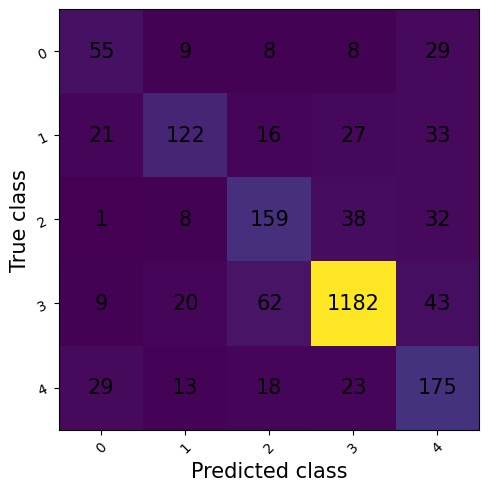

In [6]:
BATCH_SIZE = 32
NUM_WORKERS = 2
NUM_CLASSES = 5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transforms = ShuffleNet_V2_X0_5_Weights.IMAGENET1K_V1.transforms()
validset = CassavaDataset('/content/drive/MyDrive/Module-2-Group-Project/cassava-leaf-disease-classification.zip', train=False, transform=transforms)
validloader = DataLoader(validset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

model = BaselineModel.load('/content/drive/MyDrive/Module-2-Group-Project/baseline.pt').to(device)

print("Evaluating baseline model...")

acc, confusion_matrix = evaluate(model, validloader, [Accuracy(task="multiclass", num_classes=NUM_CLASSES), MulticlassConfusionMatrix(num_classes=NUM_CLASSES)], device)

print(f"Valid Accuracy: {acc.compute():.2%}")

confusion_matrix.plot()

# Your turn to Code !

In [7]:
# Write your code here...

## Training a Model

In [ ]:
def train(model: nn.Module, dataloader: DataLoader, optimizer: torch.optim.Optimizer, criterion: nn.Module, metrics,
          device, debug: bool = False):
    for metric in metrics:
      metric.reset()

    model.train()
    for data in tqdm.tqdm(trainloader):
        optimizer.zero_grad()

        inputs, labels = data['image'].to(device), data['target'].to(device).long()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        for metric in metrics:
              metric.update(outputs, labels)

        if debug:
            break

    return metrics

BATCH_SIZE = 32
NUM_WORKERS = 2
NUM_CLASSES = 5
NUM_EPOCHS = 10
LR = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transforms = ShuffleNet_V2_X0_5_Weights.IMAGENET1K_V1.transforms()
trainset = CassavaDataset('/content/drive/MyDrive/Module-2-Group-Project/cassava-leaf-disease-classification.zip', train=True, transform=transforms)
validset = CassavaDataset('/content/drive/MyDrive/Module-2-Group-Project/cassava-leaf-disease-classification.zip', train=False, transform=transforms)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
validloader = DataLoader(validset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

model = BaselineModel(NUM_CLASSES).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()

train_acc = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)
test_acc = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)

print(f"Running training on {device}...")
for epoch in range(NUM_EPOCHS):
    train(model, trainloader, optimizer, criterion, [train_acc], device)
    evaluate(model, validloader, [test_acc], device)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} Train Accuracy: {train_acc.compute():.2%} Valid Accuracy: {test_acc.compute():.2%}")


Running training on cuda...


  0%|          | 0/602 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
 31%|███       | 184/602 [01:10<04:13,  1.65it/s]

In [ ]:
torch.save({"num_classes": NUM_CLASSES, "params": model.state_dict()}, '/content/drive/MyDrive/Module-2-Group-Project/baseline.pt')